In [8]:
# Train and draw out a decision tree

from IPython import display
from sklearn import datasets, tree, utils
import graphviz 

# target (y) has 3 classes, 50 observations each
dataset = datasets.load_iris()
print(dataset['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

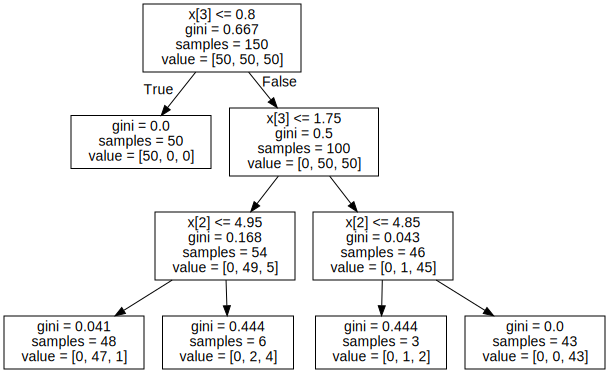

In [9]:
# Train a small decision tree on the iris data set
X_iris, y_iris = utils.shuffle(dataset.data, dataset.target, random_state=42)
tree_clf = tree.DecisionTreeClassifier(max_depth=3).fit(X_iris, y_iris)

# Generate a plot of the decision tree
graphviz.Source(tree.export_graphviz(tree_clf, out_file=None))

## Decision Tree Regressor

In [10]:
# Train a basic decision tree.  Can you do better?
from sklearn.datasets import load_diabetes
from sklearn import model_selection
import pandas as pd

X, y = load_diabetes(return_X_y=True)
print(X[:10], y[:10])

[[ 0.03807591  0.05068012  0.06169621  0.02187239 -0.0442235  -0.03482076
  -0.04340085 -0.00259226  0.01990749 -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 -0.02632753 -0.00844872 -0.01916334
   0.07441156 -0.03949338 -0.06833155 -0.09220405]
 [ 0.08529891  0.05068012  0.04445121 -0.00567042 -0.04559945 -0.03419447
  -0.03235593 -0.00259226  0.00286131 -0.02593034]
 [-0.08906294 -0.04464164 -0.01159501 -0.03665608  0.01219057  0.02499059
  -0.03603757  0.03430886  0.02268774 -0.00936191]
 [ 0.00538306 -0.04464164 -0.03638469  0.02187239  0.00393485  0.01559614
   0.00814208 -0.00259226 -0.03198764 -0.04664087]
 [-0.09269548 -0.04464164 -0.04069594 -0.01944183 -0.06899065 -0.07928784
   0.04127682 -0.0763945  -0.04117617 -0.09634616]
 [-0.04547248  0.05068012 -0.04716281 -0.01599898 -0.04009564 -0.02480001
   0.00077881 -0.03949338 -0.06291688 -0.03835666]
 [ 0.06350368  0.05068012 -0.00189471  0.06662945  0.09061988  0.10891438
   0.02286863  0.01770335 -0.03581619  0.00306441]


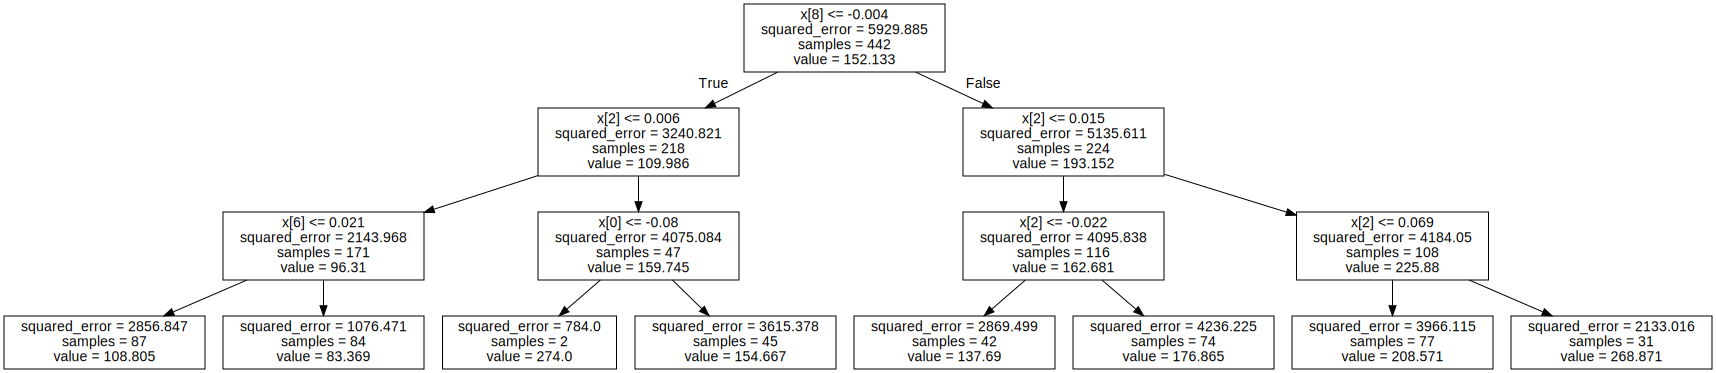

In [11]:
# Train a small decision tree on the iris data set
X, y = utils.shuffle(X, y, random_state=42)
tree_reg = tree.DecisionTreeRegressor(max_depth=3).fit(X, y)

# Generate a plot of the decision tree
graphviz.Source(tree.export_graphviz(tree_reg, out_file=None))

Regression trees typically minimize the mean squared error. Notice in the figure above that the "values" associated with each node are no longer vectors containing information on number of observations associated with each class. Instead the values are scalars. The MSE of each node is computed by comparing the values of the observations (or samples) in that node to the value of the node itself. 

### Hyperparameters

The architecture of decision trees can be controlled by many hyperparameters (see Sklearn's [documentation](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) for details). The decision tree classifier and regressor share all of the same hyperparameters except for one -- there is a "class_weight" option for the classifier in the event you have unbalanced classes. (See the Unbalanced Classes notebook for information.) We have listed four major ones with their descriptions below:

<table>
<tr>
<th style="text-align: left">Feature</th>
<th style="text-align: left">Value</th>
</tr>

<tr>
<td style="text-align: left"><code>max_features</code></td>
<td style="text-align: left">The number of features to consider when choosing a split for an internal node</td>
</tr>

<tr>
<td style="text-align: left"><code>max_depth</code></td>
<td style="text-align: left">The maximum depth of tree from the root</td>
</tr>

<tr>
<td style="text-align: left"><code>min_samples_split</code></td>
<td style="text-align: left">Minimum number of samples required for a split to be considered</td>
</tr>

<tr>
<td style="text-align: left"><code>min_samples_leaf</code></td>
<td style="text-align: left">Minimum number of samples required for each leaf</td>
</tr>
</table>

Play around with different values for different hyperparameters in the cell below, to get a feel for what they do.

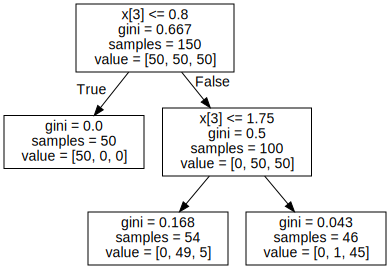

In [12]:
tree_clf = tree.DecisionTreeClassifier(min_samples_leaf=30).fit(X_iris, y_iris)

# Generate a plot of the decision tree
graphviz.Source(tree.export_graphviz(tree_clf, out_file=None))

## Ensemble Methods
### Random Forests

A random forest is just an ensemble of decision trees.  The predicted value is just the average of the trees (for both regression and classification problems -- for classification problems, it is the probabilities that are averaged).  You can adjust `n_estimators` to change the number of trees in the forest.  Random forests demonstrate the idea of bootstrap aggregation, or **bagging**. Each individual model has an equal vote in the ensemble, and you have the freedom to skew the weak learners towards higher variance, knowing that the averaging will (ideally) wash out the randomness and prevent overfitting.

If each tree is trained on the same subset of data, why aren't they identical?  Two reasons:
1. **Subsampling**: each tree is actually trained on a random selected (with replacement) subset (i.e. bootstrap)
1. **Maximum Features**: the optimal split comes from a randomly selected subset of the features.  In Scikit-learn, this feature is controlled by `max_features`.

If you take a look at the [documentation](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html), you'll notice that while random forests share many hyperparameters in common with decision trees, random forests have a few more:

<table>
<tr>
<th style="text-align: left">Feature</th>
<th style="text-align: left">Value</th>
</tr>

<tr>
<td style="text-align: left"><code>n_estimators</code></td>
<td style="text-align: left">The number of trees in the forest.</td>
</tr>

<tr>
<td style="text-align: left"><code>bootstrap</code></td>
<td style="text-align: left">Whether bootstrap samples are used when building trees.</td>
</tr>

<tr>
<td style="text-align: left"><code>oob_score</code></td>
<td style="text-align: left">Whether to use out-of-bag samples to estimate the generalization accuracy.</td>
</tr>

<tr>
<td style="text-align: left"><code>n_jobs</code></td>
<td style="text-align: left">The number of jobs to run in parallel for both fit and predict. If -1, then the number of jobs is set to the number of cores.</td>
</tr>

<tr>
<td style="text-align: left"><code>warm_start</code></td>
<td style="text-align: left">When set to True, reuse the solution of the previous call to fit and add more estimators to the ensemble, otherwise, just fit a whole new forest.</td>
</tr>
</table>

Notice how their construction can be parallelized by setting the parameter `n_jobs`.

### Extremely Random Forests

As described Sklearn's [documentation](http://scikit-learn.org/stable/modules/ensemble.html) for ensemble methods:

>In extremely randomized trees (see `ExtraTreesClassifier` and `ExtraTreesRegressor` classes), randomness goes one step further in the way splits are computed. As in random forests, a random subset of candidate features is used, but instead of looking for the most discriminative thresholds, thresholds are drawn at random for each candidate feature and the best of these randomly-generated thresholds is picked as the splitting rule. This usually allows to reduce the variance of the model a bit more, at the expense of a slightly greater increase in bias.

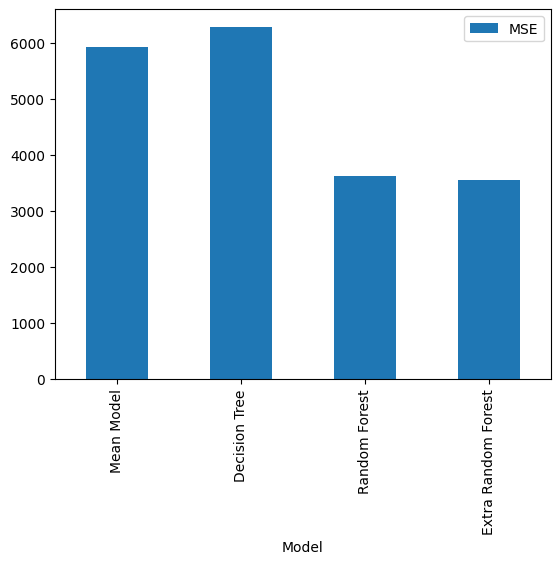

In [13]:
from sklearn import model_selection, ensemble
import pandas as pd

cv = model_selection.ShuffleSplit(n_splits=20, test_size=0.2, random_state=42)
def compute_error(clf, X, y):
    return - model_selection.cross_val_score(clf, X, y, cv=cv, scoring='neg_mean_squared_error').mean()

tree_reg = tree.DecisionTreeRegressor()
extra_reg = ensemble.ExtraTreesRegressor(n_estimators=10)
forest_reg = ensemble.RandomForestRegressor(n_estimators=10)

model_performance = pd.DataFrame([
    ("Mean Model", y.var()),
    ("Decision Tree", compute_error(tree_reg, X, y)),
    ("Random Forest", compute_error(forest_reg, X, y)),
    ("Extra Random Forest", compute_error(extra_reg, X, y)),
], columns=["Model", "MSE"])
model_performance.plot(x="Model", y="MSE", kind="bar");

### Gradient Boosting Trees
Gradient Boosting algorithms train a sequence of models and combine them to make sophisticated (low bias) predictions. The key idea is that we can iteratively reduce any loss function using a strategy that imitates gradient descent.

The combined model can be written as

$$ f(X) = f_m(X) = \sum_{k=1}^m \gamma_k h_k(x) $$

where $h_k$ are **weak learners**.  For Gradient Boosting Trees, the $h_k$ are stump trees (very short trees, often with a single split). At each iteration, we want to add a new term to the sum that reduces the loss function. First, we train a weak learner $h_m$ to fit the **pseudo-residuals**

$$r_m = - \left[\frac{\partial L(y_{true},y_{pred})}{\partial y_{pred}} \right]_{y_{pred} = f_{m-1}(X)}     $$

and then we do a linear search to find the coefficient $\gamma_m$ that minimizes

$$ L(y_{true},f_{m-1}(X) + \gamma_m h_m(X)) .$$

The intuition is that $r_m$ represents the direction in which we would like to modify our predictions to decrease the loss function most quickly. $h_m(X)$ represents a step that's roughly in the same direction, although there will be some error because of how simple the weak learners are. (by design, otherwise the algorithm would overfit) It's not obvious how big of a step we should take in the $h_m(X)$ direction, so we do a search to find the best coefficient. Then we set

$$ f_m(x) = f_{m-1}(x) + \gamma_m h_m(x) $$

as our new predictor and iterate. 

We can give a more concrete description when the loss function is mean squared error. In this case, the pseudo-residuals are residuals in the usual sense (times a constant), so the training target for each new term is just the prediction error of the previous stage of the model. As you can see in the following demo, we gradually build a complicated model by iteratively compensating for the error in the previous stage.  

In [15]:
import seaborn as sns
from matplotlib import pylab as plt
from ipywidgets import interact
import numpy as np
sns.set(font_scale=1.5)

# Generate test data
rng = np.random.RandomState(42)
N_points = 400
X = np.sort(5 * rng.rand(N_points, 1), axis=0)
y = np.sin(X).ravel() + .4 * (0.5 - rng.rand(N_points))

# Regular array of X values for plotting
X_reg = np.linspace(0,5,50)    

# Helper code to plot data and predictions
def make_subplot(y,y_pred,color,title,label):
    plt.plot(X, y, 'b.')
    plt.plot(X_reg,y_pred,c=color,label=label)
    plt.ylim(-1.3,1.3)
    plt.title(title)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()

# Fit/plot gradient boosting model and next term
def make_plot(n_estimators=1):    
    est = ensemble.GradientBoostingRegressor(n_estimators=n_estimators, learning_rate=1, max_depth=1)
    est.fit(X,y)
    y_pred = est.predict(X_reg.reshape(-1,1))
    
    residuals = y - est.predict(X.reshape(-1,1))
    res_est = tree.DecisionTreeRegressor(max_depth=1)
    y_res = res_est.fit(X.reshape(-1,1),residuals).predict(X_reg.reshape(-1,1))  
    
    fig, ax = plt.subplots()
    fig.set_size_inches(20, 8)
    plt.subplot(1, 2, 1)
    make_subplot(y,y_pred,"red","Original Data","Boosting Model")
    plt.subplot(1, 2, 2)
    make_subplot(residuals,y_res,"green","Residuals","Next Term")

interact(make_plot, n_estimators=(1,25))

interactive(children=(IntSlider(value=1, description='n_estimators', max=25, min=1), Output()), _dom_classes=(…

<function __main__.make_plot(n_estimators=1)>

There are a few basic variants that are usually applied

1.  **Learning Rate**: we usually reduce the learning rate $\alpha$ by choosing a value $0 < \alpha < 1$ such that

    $$ f_m(x) = f_{m-1}(x) + \alpha \gamma_m h_m(x) $$

    Setting $\alpha = 1$ would yield the model present above.  This slows down the rate at which we learn.
1.  **Subsampling**: we can learn on a fraction of the data which is a subsample of the full data set.
1.  **Max Features**: we can learn from only a subset of the features (i.e. trees only select a subset of the features).
1.  **Trying out different loss functions**: We can choose different functional forms $L$.

Beware of overfitting here. You can learn more about gradient boosting [here](http://scikit-learn.org/stable/modules/ensemble.html) and [here](https://machinelearningmastery.com/gentle-introduction-gradient-boosting-algorithm-machine-learning/).

**Question**: How do these techniques affect the bias and variance of the learned models?

/tmp/ipykernel_15062/3449595313.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_performance.append(gradient_performance).plot(x="Model", y="MSE", kind="bar");


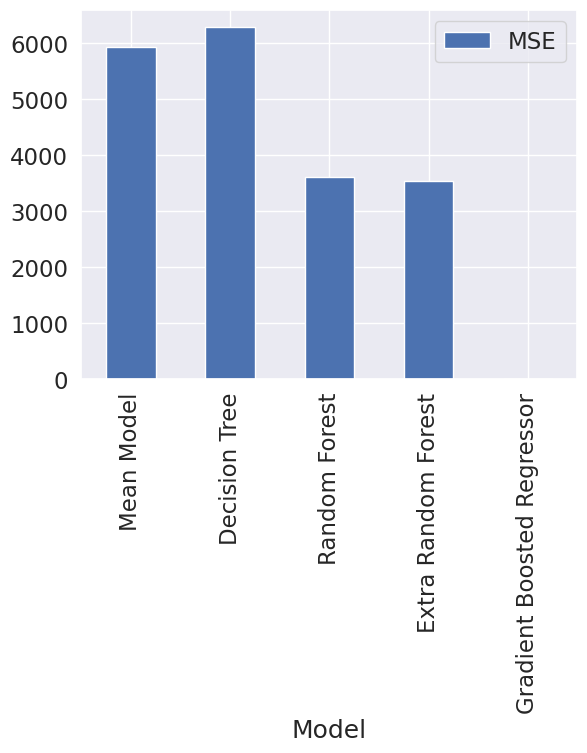

In [17]:
# GradientBoostingRegressor

gradient_reg = ensemble.GradientBoostingRegressor()

gradient_performance = pd.DataFrame([
    ("Gradient Boosted Regressor", compute_error(gradient_reg, X, y))
], columns=["Model", "MSE"])

model_performance.append(gradient_performance).plot(x="Model", y="MSE", kind="bar");

## Determining feature importance
With a linear regression, we could inspect the coefficients to tell which terms were the most important.  With decision trees and random forests, the model structure is much more opaque.  Fortunately, all of these models (once trained) have an array called `feature_importances_` which gives the importances of all the features.  How do they compute feature importance?  According to the [Scikit documentation](http://scikit-learn.org/stable/modules/ensemble.html#feature-importance-evaluation):

> The relative rank (i.e. depth) of a feature used as a decision node in a tree can be used to assess the relative importance of that feature with respect to the predictability of the target variable. Features used at the top of the tree are used contribute to the final prediction decision of a larger fraction of the input samples. The expected fraction of the samples they contribute to can thus be used as an estimate of the relative importance of the features.

Let's show this in action.  For Scikit, larger values are more important and the values of `feature_importances_` sum to 1:

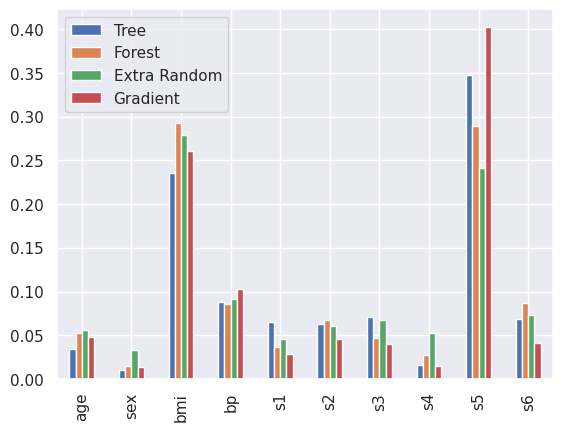

In [31]:
data = load_diabetes(return_X_y=False, as_frame=False, scaled=True)
x_diab = data['data']
y_diab = data['target']
columns = data['feature_names']

sns.set(font_scale=1)
pd.DataFrame([
    tree_reg.fit(x_diab, y_diab).feature_importances_,
    forest_reg.fit(x_diab, y_diab).feature_importances_,
    extra_reg.fit(x_diab, y_diab).feature_importances_,
    gradient_reg.fit(x_diab, y_diab).feature_importances_
], columns=columns, index=["Tree", "Forest", "Extra Random", "Gradient"]).T.plot(kind="bar").legend(loc="upper left");